In [12]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [72]:
# Read the dataset and display. You will get the output as mentioned below

df = pd.read_csv(r'C:\Users\dell\Downloads/train.csv')

df

,col1,col2,output
0,-38.366669,113.000000,1
1,-39.818572,123.943369,1
2,-55.638240,114.551862,1
3,-36.378005,95.616515,1
4,-39.366669,112.000000,1
...,...,...,...
1273,-7.017043,3.026211,0
1274,5.633331,5.000000,0
1275,-13.501376,-12.774656,0
1276,-13.451631,0.015515,0


In [5]:
df.shape

(1278, 3)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1278 entries, 0 to 1277
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   col1    1278 non-null   float64
 1   col2    1278 non-null   float64
 2   output  1278 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 30.1 KB


In [18]:
y = df['output']
X = df.drop('output',axis = 1)

## Training Test split

In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size = 0.80,random_state = 0)

## Training model using Logistic regression

In [24]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

## Evaluation on Training data

In [25]:
y_train_pred = model.predict(X_train)

In [26]:
from sklearn import metrics

metrics.accuracy_score(y_train, y_train_pred)

0.5998043052837574

In [28]:
y_test_pred = model.predict(X_test)


## Accuracy

In [29]:
# calculate accuracy of class predictions

from sklearn import metrics

metrics.accuracy_score(y_test, y_test_pred)

0.61328125

## Training svm model using rbf

In [45]:
from sklearn.svm import SVC
classifier = SVC(kernel='rbf')
classifier.fit(X_train, y_train)

SVC()

In [50]:
y_train_rbf = classifier.predict(X_train)

In [51]:
y_test_rbf = classifier.predict(X_test)


## Accuracy

In [52]:
# calculate accuracy of class predictions

from sklearn import metrics

metrics.accuracy_score(y_test, y_test_rbf)

1.0

## Training svm model using linear

In [36]:
from sklearn.svm import SVC
classifier1= SVC(kernel='linear')
classifier1.fit(X_train, y_train)




SVC(kernel='linear')

In [41]:
y_train_linear = classifier1.predict(X_train)

In [42]:
y_test_linear = classifier1.predict(X_test)


In [43]:
# calculate accuracy of class predictions

from sklearn import metrics

metrics.accuracy_score(y_test, y_test_linear)

0.61328125

In [44]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_test_linear)

0.5

## Report for all models

In [61]:
from sklearn.metrics import classification_report
print(metrics.classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        99
           1       0.61      1.00      0.76       157

    accuracy                           0.61       256
   macro avg       0.31      0.50      0.38       256
weighted avg       0.38      0.61      0.47       256



C:\Users\dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [70]:
from sklearn.metrics import classification_report
print(metrics.classification_report(y_test,y_test_linear))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        99
           1       0.61      1.00      0.76       157

    accuracy                           0.61       256
   macro avg       0.31      0.50      0.38       256
weighted avg       0.38      0.61      0.47       256



In [62]:
from sklearn.metrics import classification_report
print(metrics.classification_report(y_test,y_test_rbf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        99
           1       1.00      1.00      1.00       157

    accuracy                           1.00       256
   macro avg       1.00      1.00      1.00       256
weighted avg       1.00      1.00      1.00       256



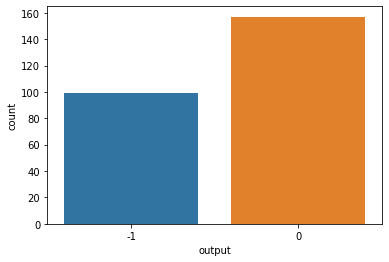

In [59]:
residual_test = y_test - y_test_pred

sns.countplot(residual_test)


In [68]:
con_metric = metrics.confusion_matrix(y_test, y_test_rbf)
con_metric


array([[ 99,   0],
       [  0, 157]], dtype=int64)

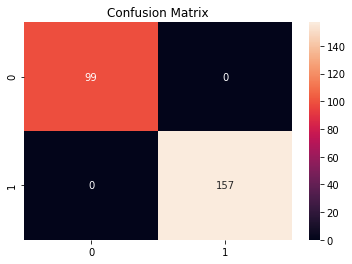

In [69]:
sns.heatmap(con_metric, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.show()

## Serializing the model 

In [73]:
from pickle import dump

dump(classifier, open('rbf_pickle.pkl', 'wb'))



## Observation

<b> For above three models ,I get good accuracy for three models but for support vector classifier using rbf ,accuracy is maximum while comparing to other models.svc using rbf is the best model .svc using rbf is better than others